# Load TFLite Model 

In [13]:
import tensorflow as tf

model_dir = 'saved_model/1'

loaded = tf.saved_model.load(model_dir)

print(list(loaded.signatures.keys()))
infer = loaded.signatures["serving_default"]
print(infer.structured_input_signature)
print(infer.structured_outputs)

['serving_default']
((), {'keras_layer_16_input': TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_layer_16_input')})
{'dense_26': TensorSpec(shape=(None, 6), dtype=tf.float32, name='dense_26')}


# Convert Using TFlite's Converter

Load the TFLiteConverter with the SavedModel

In [14]:
converter = tf.lite.TFLiteConverter.from_saved_model(model_dir)

### Post-Training Quantization

quantizes weights from floating point to 8-bits of precision

In [15]:
converter.optimizations = [tf.lite.Optimize.DEFAULT]

### Convert the model

In [16]:
tflite_model = converter.convert()
tflite_model_file = 'converted_model.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

# Test the TFLite Model Using the Python Interpreter

In [25]:
# Load TFLite model and allocate tensors.
  
interpreter = tf.lite.Interpreter(model_path=tflite_model_file)
interpreter.allocate_tensors()

input_index = interpreter.get_input_details()
output_index = interpreter.get_output_details()

Predicted class for data\test\03154fd3-00a8-47d1-b1ac-0cb7d3a0696f.jpg is Plastic
Class index: 5


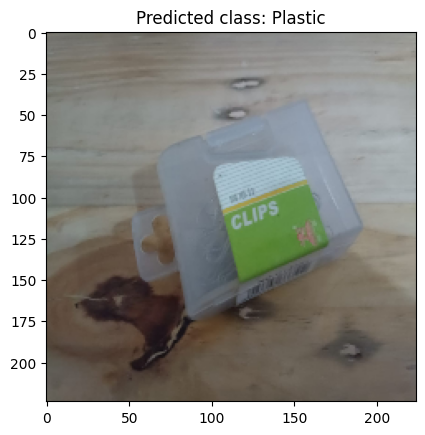

Predicted class for data\test\2034adf4-6acc-43b9-bd12-df5aacd1a0d3.jpg is Paper
Class index: 4


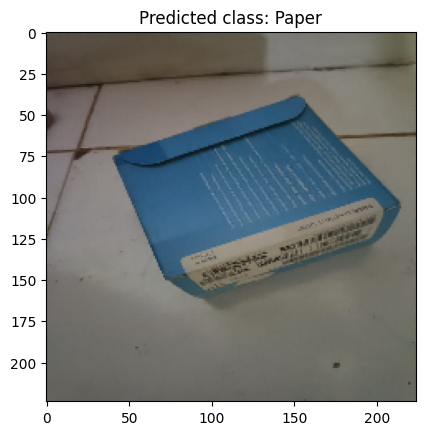

Predicted class for data\test\4d764bc8-3e8e-40ce-be28-88f700a32948.jpg is Cardboard
Class index: 0


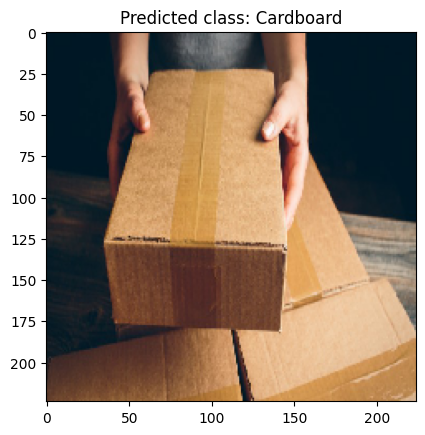

Predicted class for data\test\61a2b31c-af2e-490c-a8f8-49c61b5350ac.jpg is Glass
Class index: 1


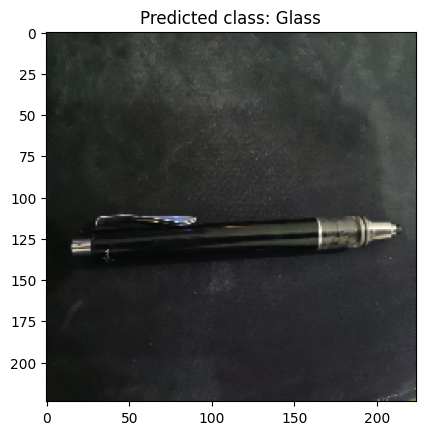

Predicted class for data\test\675ac41f-9b57-47e4-8599-a2fbdcb35c57.jpg is Glass
Class index: 1


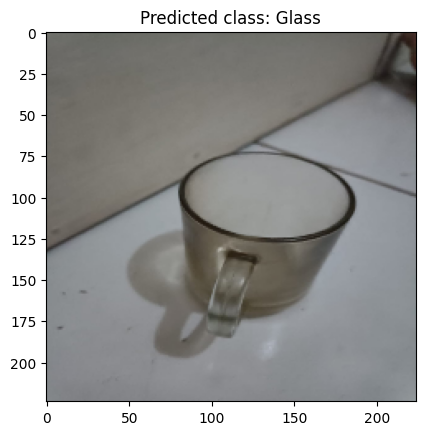

Predicted class for data\test\6f23a35c-db6a-4ed2-b000-5b7cb63d2a8e.jpg is Cardboard
Class index: 0


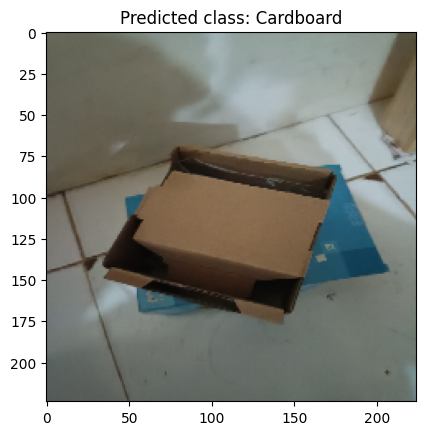

Predicted class for data\test\7a8c5202-e804-49b7-82b1-6099bdb796f7.jpg is Glass
Class index: 1


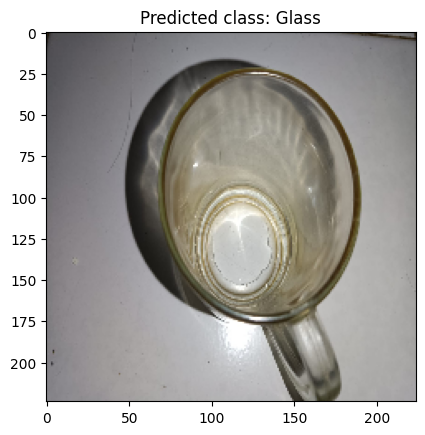

Predicted class for data\test\8adf1acb-5995-4a39-85e7-e37d01313d7a.jpg is Plastic
Class index: 5


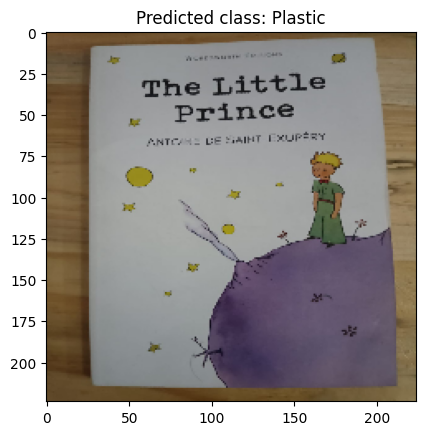

Predicted class for data\test\8ef774ff-b6da-4740-a0cd-d90a5d610990.jpg is Glass
Class index: 1


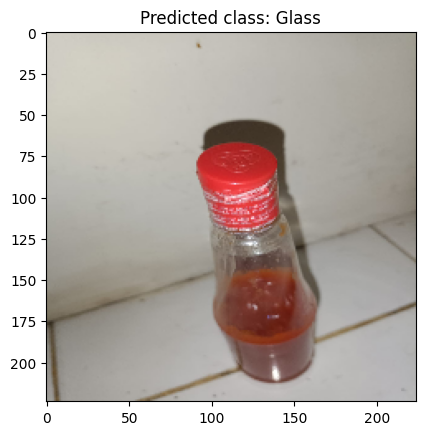

Predicted class for data\test\bottle.jpg is Glass
Class index: 1


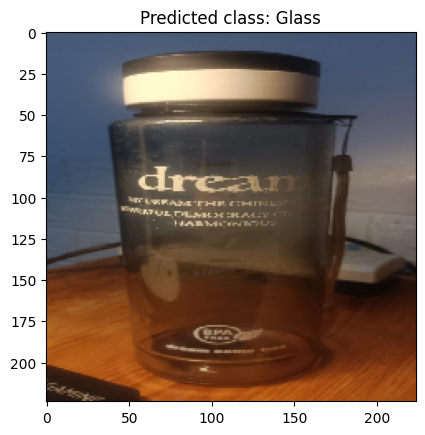

Predicted class for data\test\c865dc32-9802-4588-b5a3-055e286b73a5.jpg is Glass
Class index: 1


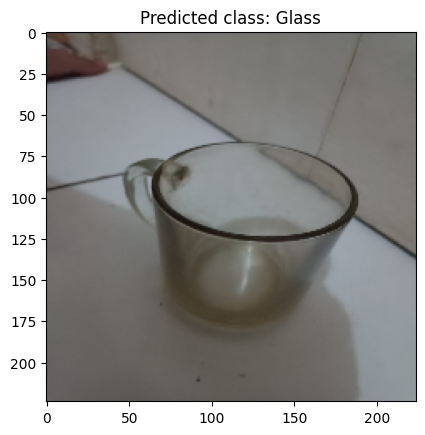

Predicted class for data\test\dd69b3f3-d4e8-4a5f-ba6b-8b237714dd03.jpg is Glass
Class index: 1


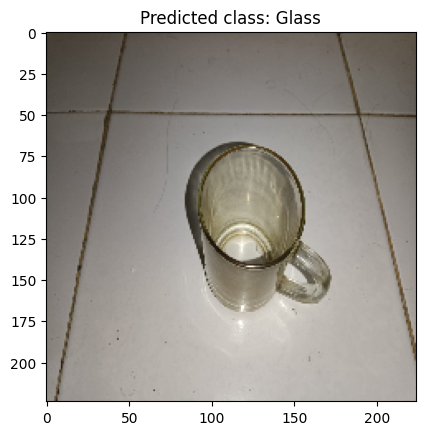

Predicted class for data\test\Drinkware.jpg is Glass
Class index: 1


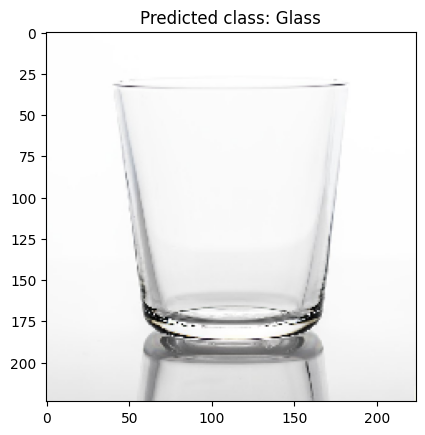

Predicted class for data\test\e9310565-c540-49fa-a606-c7d1fca33353.jpg is Paper
Class index: 4


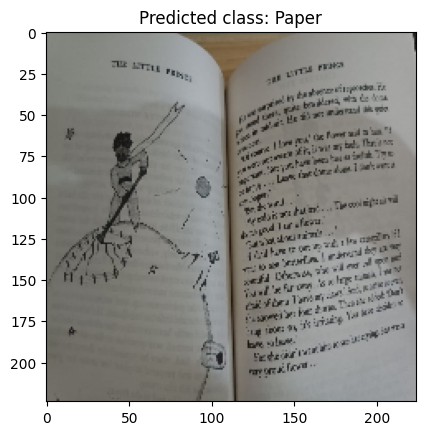

Predicted class for data\test\ec6f79ad-6499-44d5-a826-5beb73631993.jpg is Paper
Class index: 4


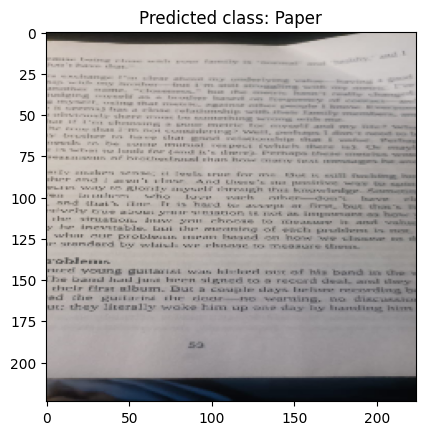

Predicted class for data\test\f26a1e41-e75d-4ac6-aa7b-985d2e90f7d0.jpg is Glass
Class index: 1


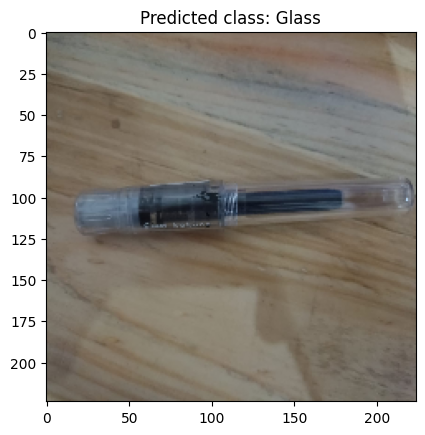

Predicted class for data\test\f94b4928-56a8-4475-80cd-2458942d0dbc.jpg is Glass
Class index: 1


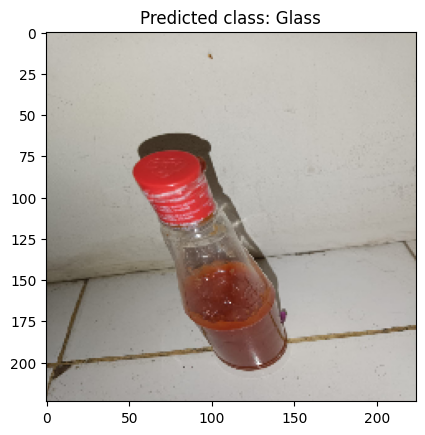

Predicted class for data\test\images.jpg is Metal
Class index: 2


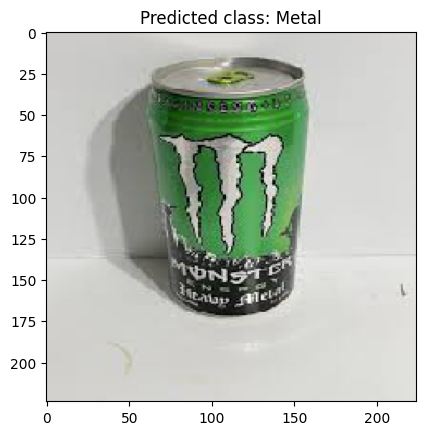

Predicted class for data\test\jonathan-cooper-0B3BaWvDtrI-unsplash-1.jpg is Glass
Class index: 1


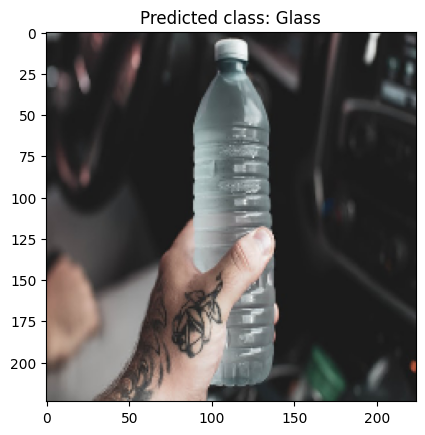

Predicted class for data\test\makanan.jpg is Organic
Class index: 3


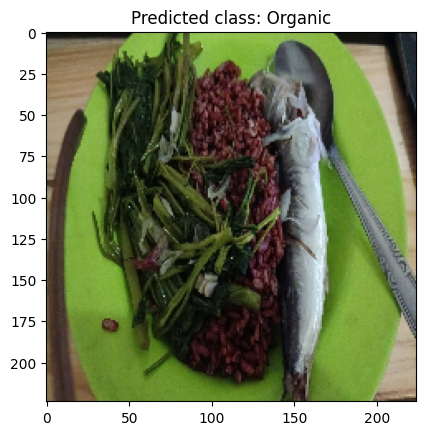

Predicted class for data\test\makanan2.jpg is Organic
Class index: 3


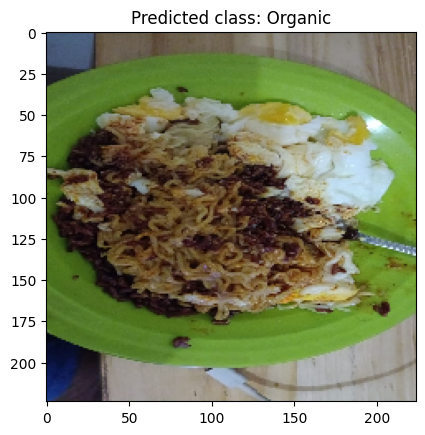

Predicted class for data\test\paper.jpg is Paper
Class index: 4


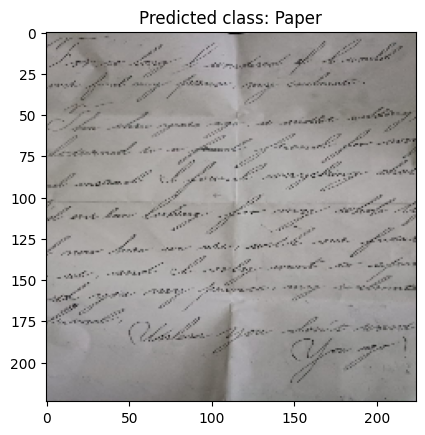

Predicted class for data\test\what to do with paper.jpeg is Paper
Class index: 4


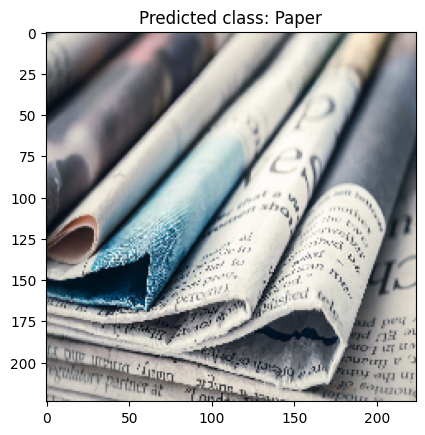

Predicted class for data\test\WhatsApp Image 2023-11-02 at 1.19.41 AM.jpeg is Cardboard
Class index: 0


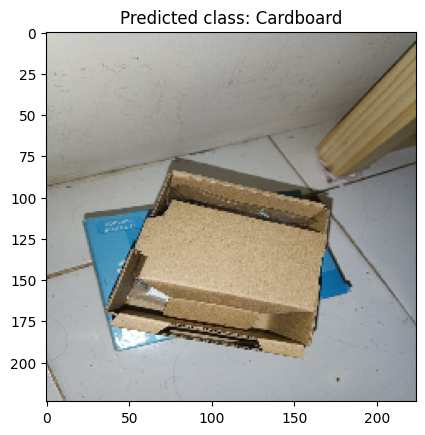

Predicted class for data\test\WhatsApp Image 2023-11-02 at 8.48.31 PM.jpeg is Plastic
Class index: 5


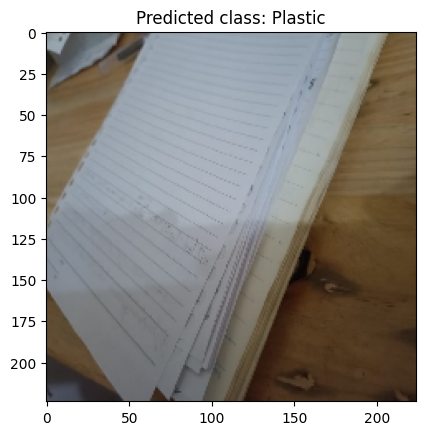

Predicted class for data\test\WhatsApp Image 2023-11-02 at 8.48.32 PM.jpeg is Paper
Class index: 4


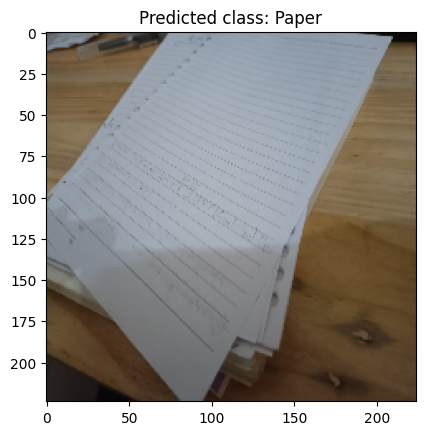

Predicted class for data\test\WhatsApp Image 2023-11-02 at 8.48.34 PM (1).jpeg is Metal
Class index: 2


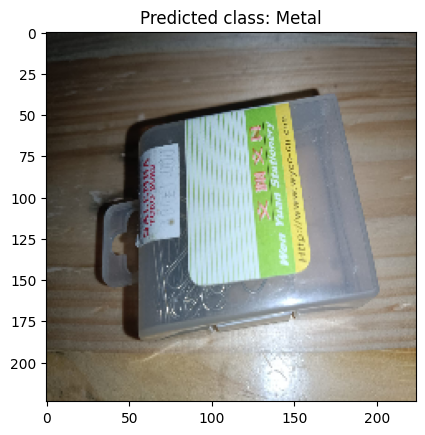

Predicted class for data\test\WhatsApp Image 2023-11-02 at 8.48.34 PM (2).jpeg is Plastic
Class index: 5


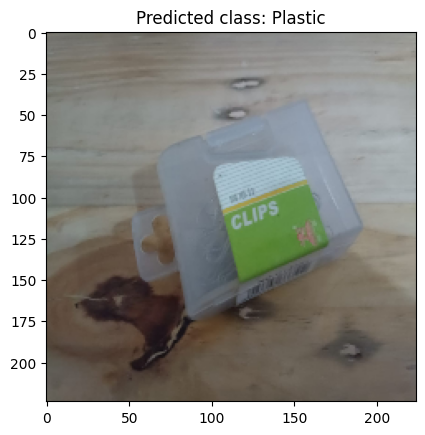

Predicted class for data\test\WhatsApp Image 2023-11-02 at 8.48.34 PM.jpeg is Metal
Class index: 2


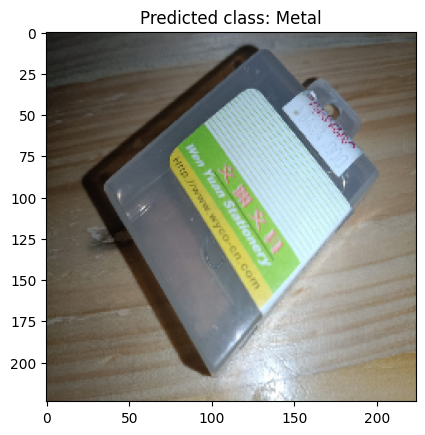

Predicted class for data\test\WhatsApp Image 2023-11-02 at 8.50.15 PM (1).jpeg is Organic
Class index: 3


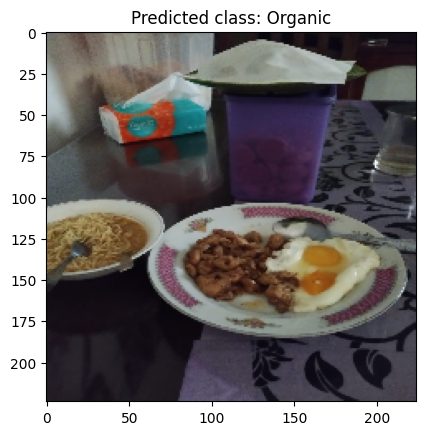

Predicted class for data\test\WhatsApp Image 2023-11-02 at 8.50.15 PM.jpeg is Organic
Class index: 3


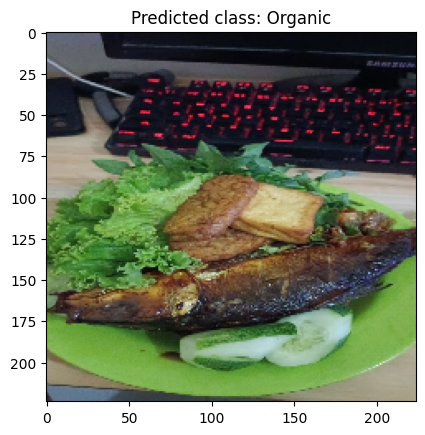

In [33]:
import os
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np
import matplotlib.pyplot as plt

class_labels = ["Cardboard", "Glass", "Metal", "Organic", "Paper", "Plastic"]

# Path to the directory containing your test images
test_dir = os.path.join('data', 'test')

# Get a list of all image files in the test directory
image_paths = [os.path.join(test_dir, file) for file in os.listdir(test_dir) if file.endswith(('.jpg', '.png', '.jpeg'))]

for image_path in image_paths:
    # Load and preprocess the image using Pillow (PIL)
    img = load_img(image_path, target_size=(224, 224))  # Load and resize the image
    x = img_to_array(img)  # Convert the image to a NumPy array
    x = x / 255.0  # Normalize the pixel values to the range [0, 1]
    
    input_data = np.expand_dims(x, axis=0)
    # Set the input tensor data
    interpreter.set_tensor(input_index[0]['index'], input_data)

    # Run the inference
    interpreter.invoke()

    # Get the output tensor data
    output_data = interpreter.get_tensor(output_index[0]['index'])

    # Get the predicted class index
    predicted_class = np.argmax(output_data)

    # Get the predicted label
    predicted_label = class_labels[predicted_class]

    print(f'Predicted class for {image_path} is {predicted_label}')
    print(f'Class index: {predicted_class}')

    plt.imshow(img)  # Display the resized image
    plt.title(f'Predicted class: {predicted_label}')
    plt.show()